# Exploring Matplotlib Internals: Figures, Axes, Lines, Patches, and More

Most of the tutorials about programming start with a Hello World example.
Let's do the same for matplotlib.

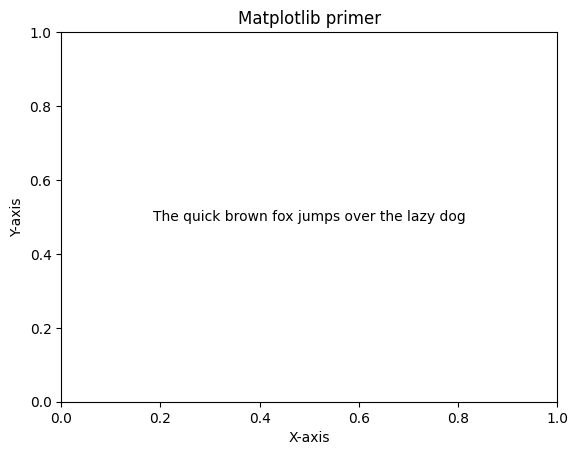

In [6]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.text(x=0.5, y=0.5, s="The quick brown fox jumps over the lazy dog", ha="center", va="center")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_title("Matplotlib primer")
fig.savefig("results/default_figure.png")
plt.show()

Three lines, and we have a Hello World example in Matplotlib.
The standard next step is to look for examples in Matplotlib documentation: https://matplotlib.org/stable/gallery/index.html and enter the code.
That's the learning trajectory for most of the people.
 
Let's reverse the learning and learn backward, starting with a problem definition we want to address. 

**Problem 1**: Let's say we want to publish a webpage with one figure in it.
The figure should contain text, and the text should be the same size as the rest of the page.
A human should not be able to see that there is an image embedded in the page.

Here is the basic HTML template for you. Could you do it?

```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>First Figure</title>
    <style>
        body {
            font-family: 'Roboto';
            font-size: 16px;
        }
    </style>
</head>
<body>
    <h1>Welcome to My Webpage</h1>
    <p>This is a simple webpage with text and a figure.</p>
    <p>Could you spot where is the figure?</p>
    <img src="<path_to_the_figure>" alt="my figure" width="600" height="400">
</body>
</html>
```



This is quite a hard problem.
And even experienced people might struggle with it.
First let's break it down into smaller problems.

* Set the figure size to be the same as in the HTML template.
* Set font and the font size in the figure to match the template.
* Remove axes, ticks, and other elements from the figure.
* Save the figure to a file.

In [2]:
fig, ax = plt.subplots()
print(f"The default size of the figure is {fig.get_size_inches()} inches")
print(f"The default DPI (Dots per inch) is {fig.get_dpi()}")
width = 300 / fig.get_dpi()
height = 150 / fig.get_dpi()
print(f"To get 300 * 150 pixels, we need to set the figure size to [{width} * {height}] inches")

plt.close() # this will close the figure in Jupyter

The default size of the figure is [6.4 4.8] inches
The default DPI (Dots per inch) is 100.0
To get 300 * 150 pixels, we need to set the figure size to [3.0 * 1.5] inches


We just learned the most important thing about the figure: it has a size and a DPI!

In [3]:
def get_figsize_in_pixels(width, height, dpi=100):
    return width / dpi, height / dpi

width=600
height=600
dpi=300

print(f"The figure size in pixels is {get_figsize_in_pixels(width, height, dpi)}")

The figure size in pixels is (2.0, 2.0)


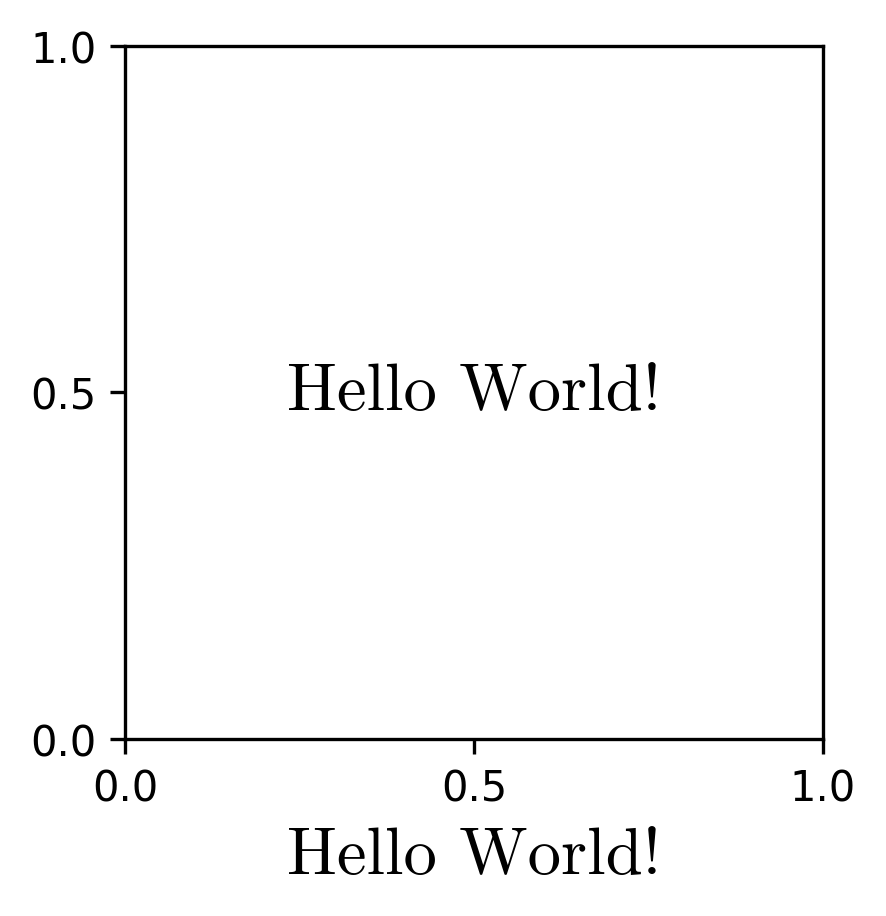

In [4]:
from pathlib import Path
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
fpath = Path(mpl.get_data_path(), "fonts/ttf/cmr10.ttf")
ax.set_xlabel('This is the default font')
ax.text(x=0.5, y=0.5, s="Hello World!", fontsize=16, ha="center", va="center", font=fpath)
ax.set_xlabel("Hello World!", fontsize=16, font=fpath)
ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0, 0.5, 1])
 # ax.set_axis_off()
# fig.tight_layout()
fig.savefig("results/hello_world.svg")
plt.show()

Now create index.html file in the same directory as this notebook and paste the following code into it.
```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>First Figure</title>
    <style>
        body {
            font-family: 'Roboto';
            font-size: 16px;
        }
    </style>
</head>
<body>
    <h1>Welcome to My Webpage</h1>
    <p>This is a simple webpage with text and a figure.</p>
    <p>Could you spot where is the figure?</p>
    <img src="results/hello_world.svg" alt="my figure" width="300" height="150">
</body>
</html>
```
Save and open it in the browser.
Can you spot the figure?

In [24]:
from pathlib import Path
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "monospace"
plt.rcParams["font.monospace"] = ["cmr10"]

print(plt.rcParams["font.sans-serif"][0])
print(plt.rcParams["font.monospace"][0])



DejaVu Sans
cmr10


/var/folders/d0/z44strys03b3nm38sh0s_q6c0000gn/T/ipykernel_35334/592978515.py:6: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(6, 2), dpi=600)


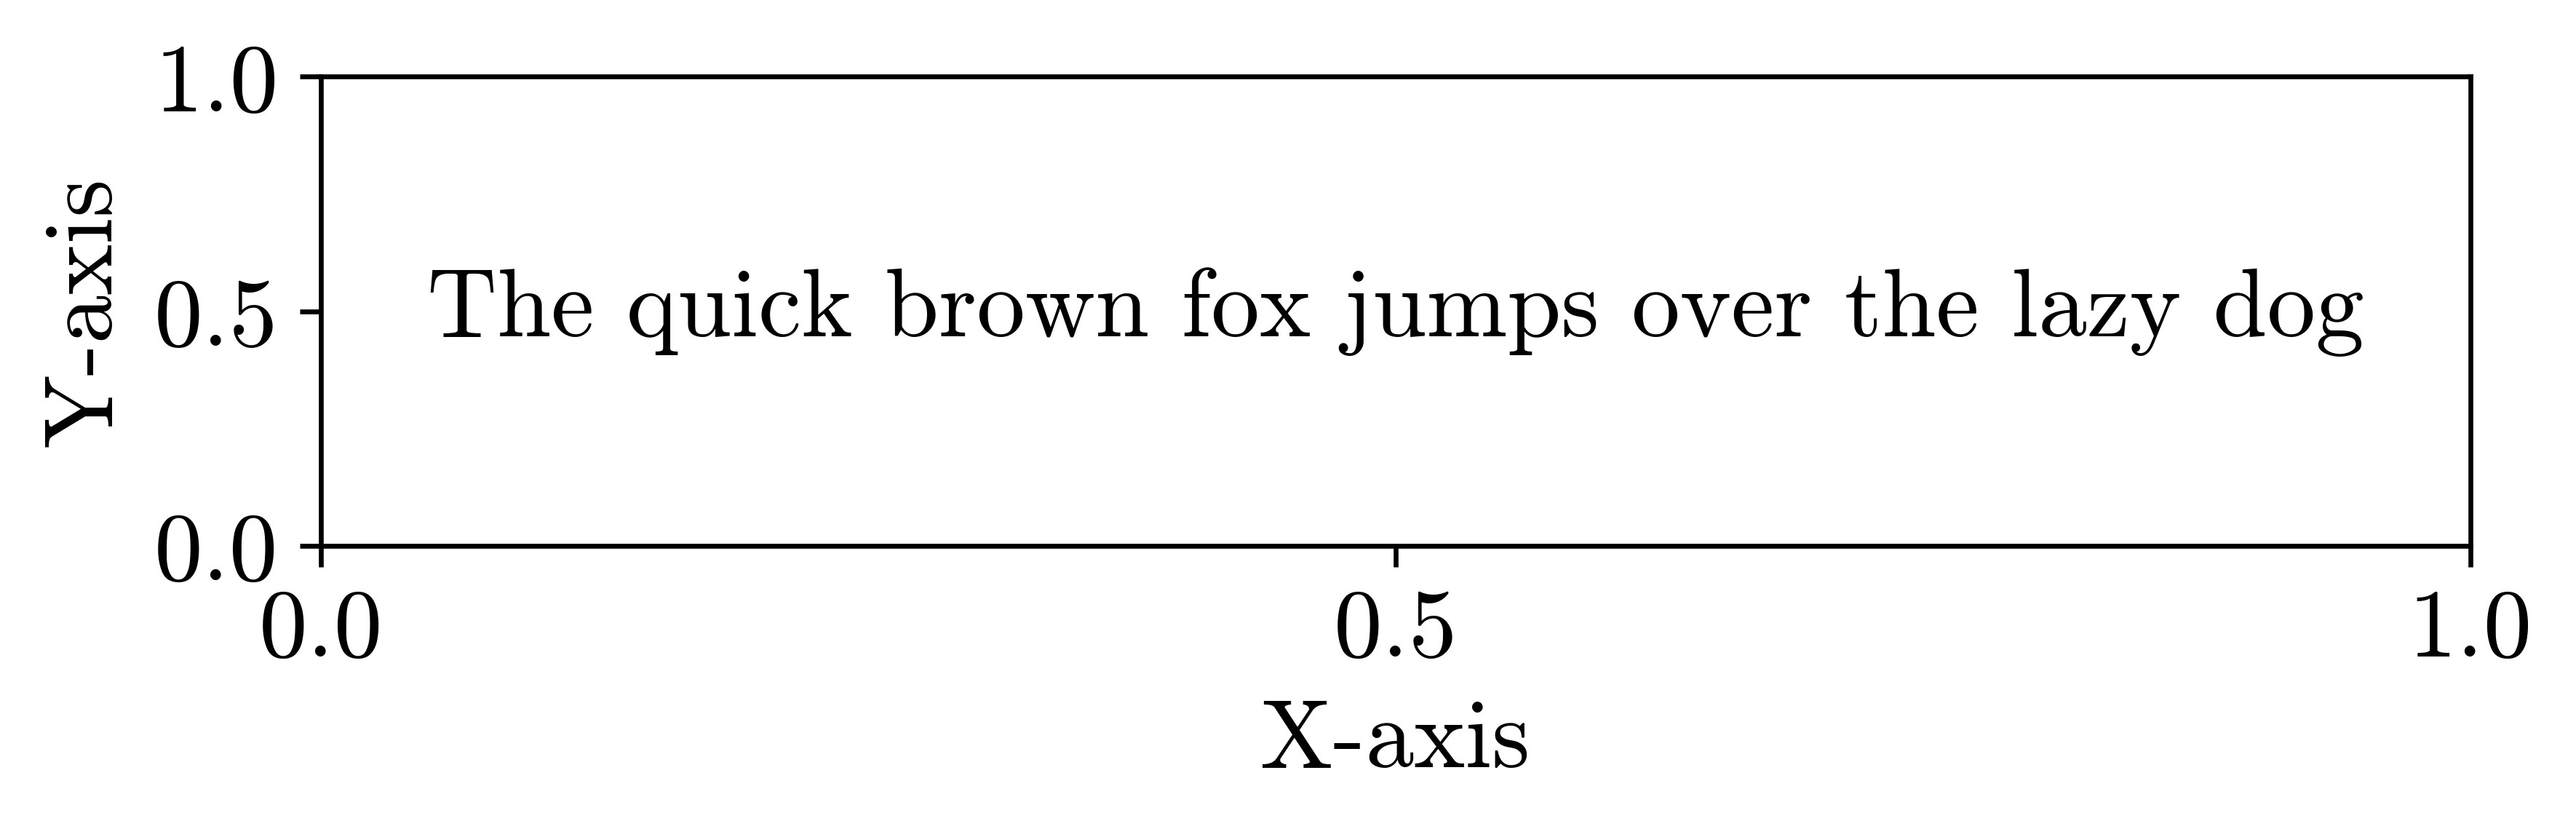

In [41]:
from pathlib import Path
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rc

fig, ax = plt.subplots(figsize=(6, 2), dpi=600)
# fpath = Path(mpl.get_data_path(), "fonts/ttf/cmr10.ttf")

ax.set_xlabel('This is the default font')
ax.text(x=0.5, y=0.5, s="The quick brown fox jumps over the lazy dog", ha="center", fontsize=16, va="center", fontfamily="cmr10")
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel("X-axis", fontsize=16, font="cmr10")
ax.set_ylabel("Y-axis", fontsize=16, font="cmr10")
ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0, 0.5, 1])
 # ax.set_axis_off()
fig.tight_layout()
fig.savefig("results/hello_world.svg")
plt.show()


/var/folders/d0/z44strys03b3nm38sh0s_q6c0000gn/T/ipykernel_35334/3747759425.py:7: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax = fig.add_axes([0, 0, 1, 1])


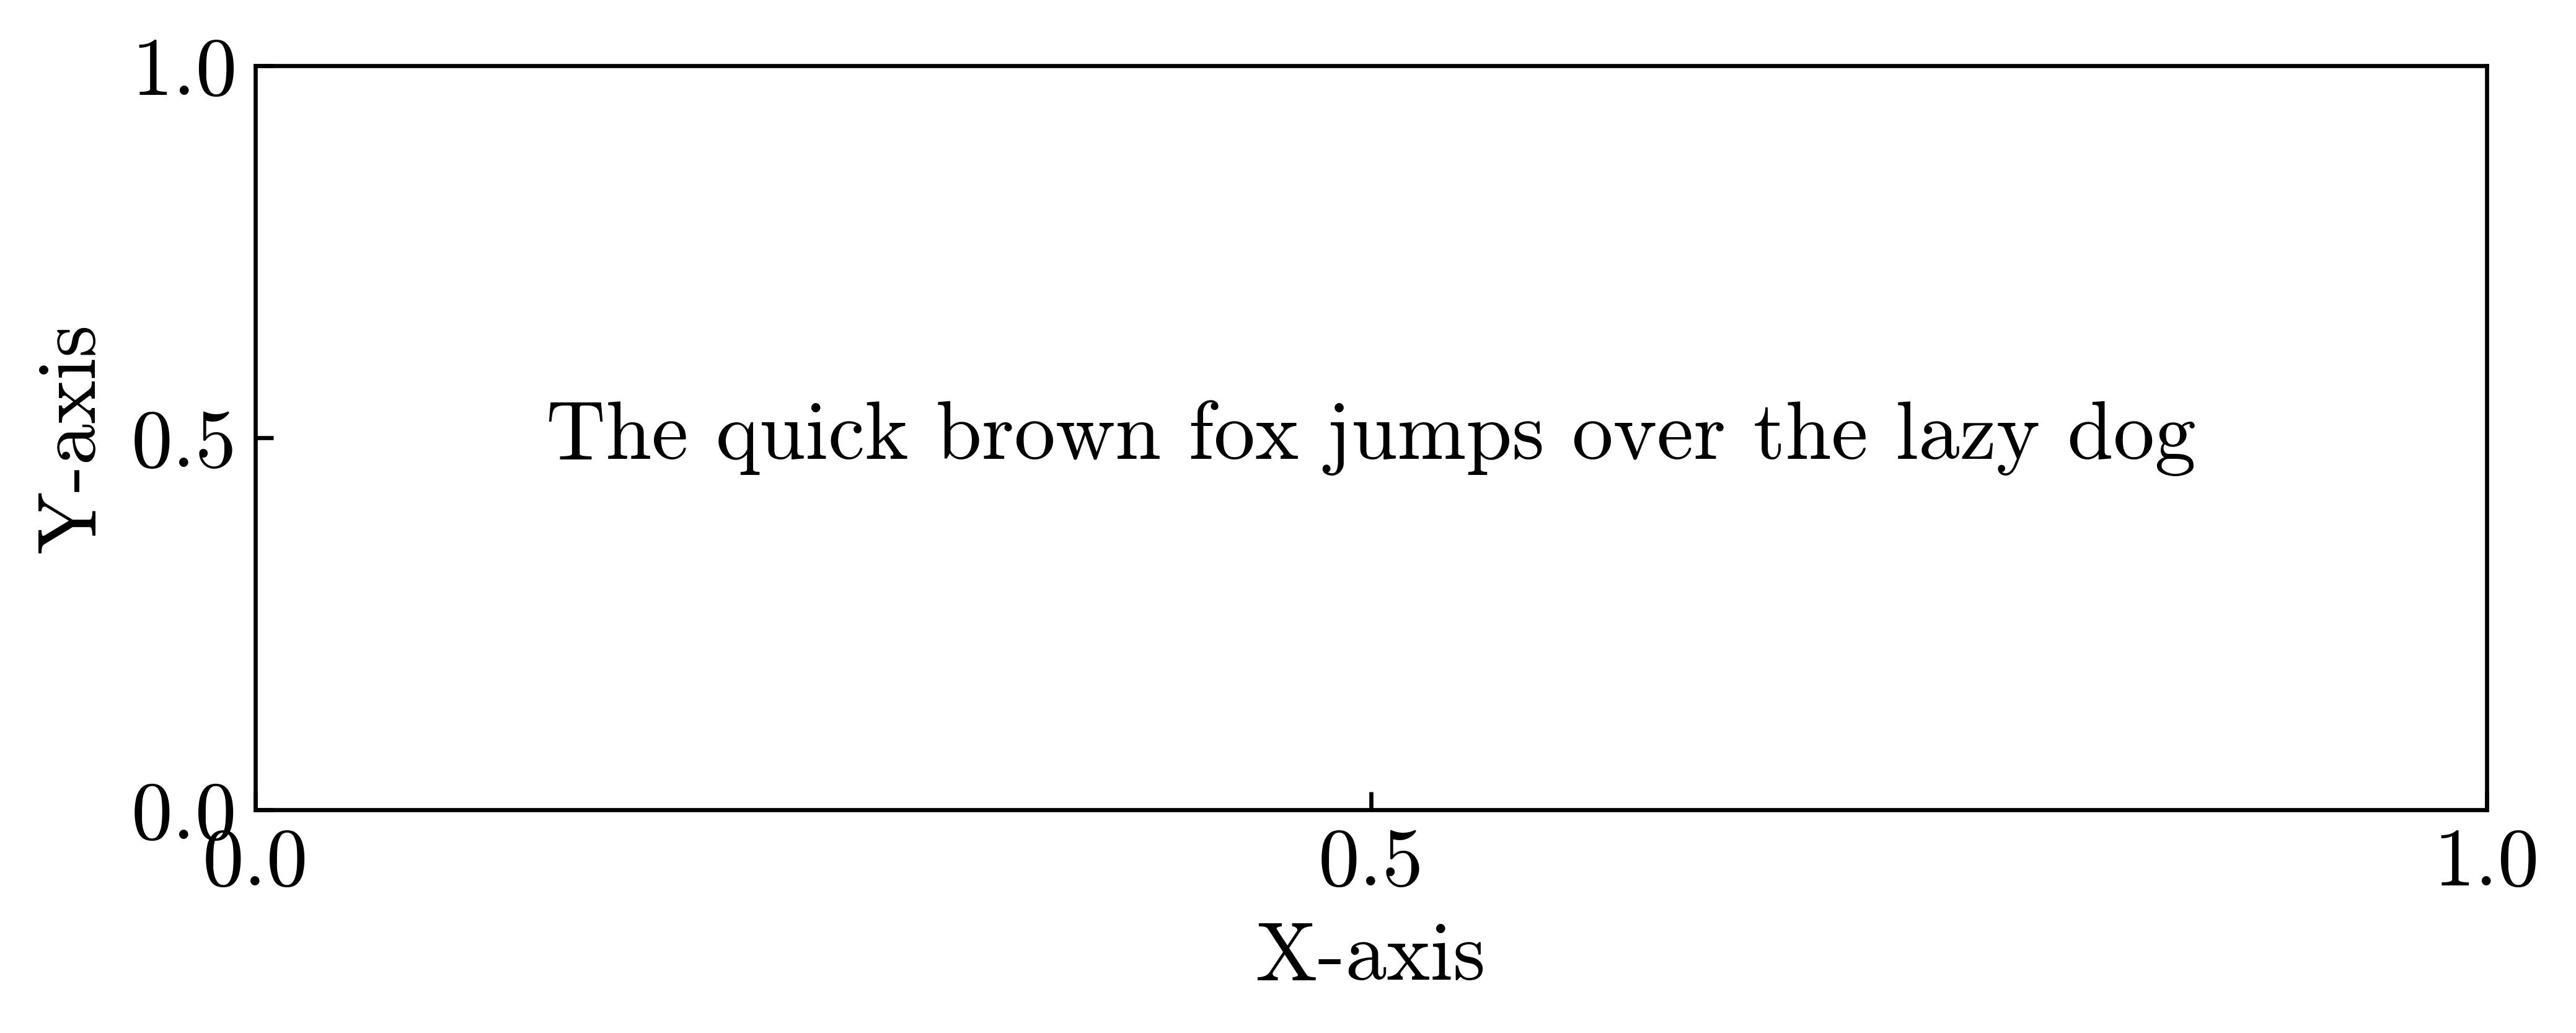

In [38]:
from pathlib import Path
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rc

fig = plt.figure(figsize=(6, 2), dpi=600)
ax = fig.add_axes([0, 0, 1, 1])
# fpath = Path(mpl.get_data_path(), "fonts/ttf/cmr10.ttf")

ax.set_xlabel('This is the default font')
ax.text(x=0.5, y=0.5, s="The quick brown fox jumps over the lazy dog", ha="center", fontsize=16, va="center", fontfamily="cmr10")
ax.set_xlabel("X-axis", fontsize=16, font="cmr10")
ax.set_ylabel("Y-axis", fontsize=16, font="cmr10")
ax.tick_params(axis='both', which='both', labelsize=16, direction="in", )
ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0, 0.5, 1])
 # ax.set_axis_off()
# fig.tight_layout()
fig.savefig("results/hello_world.svg")
plt.show()

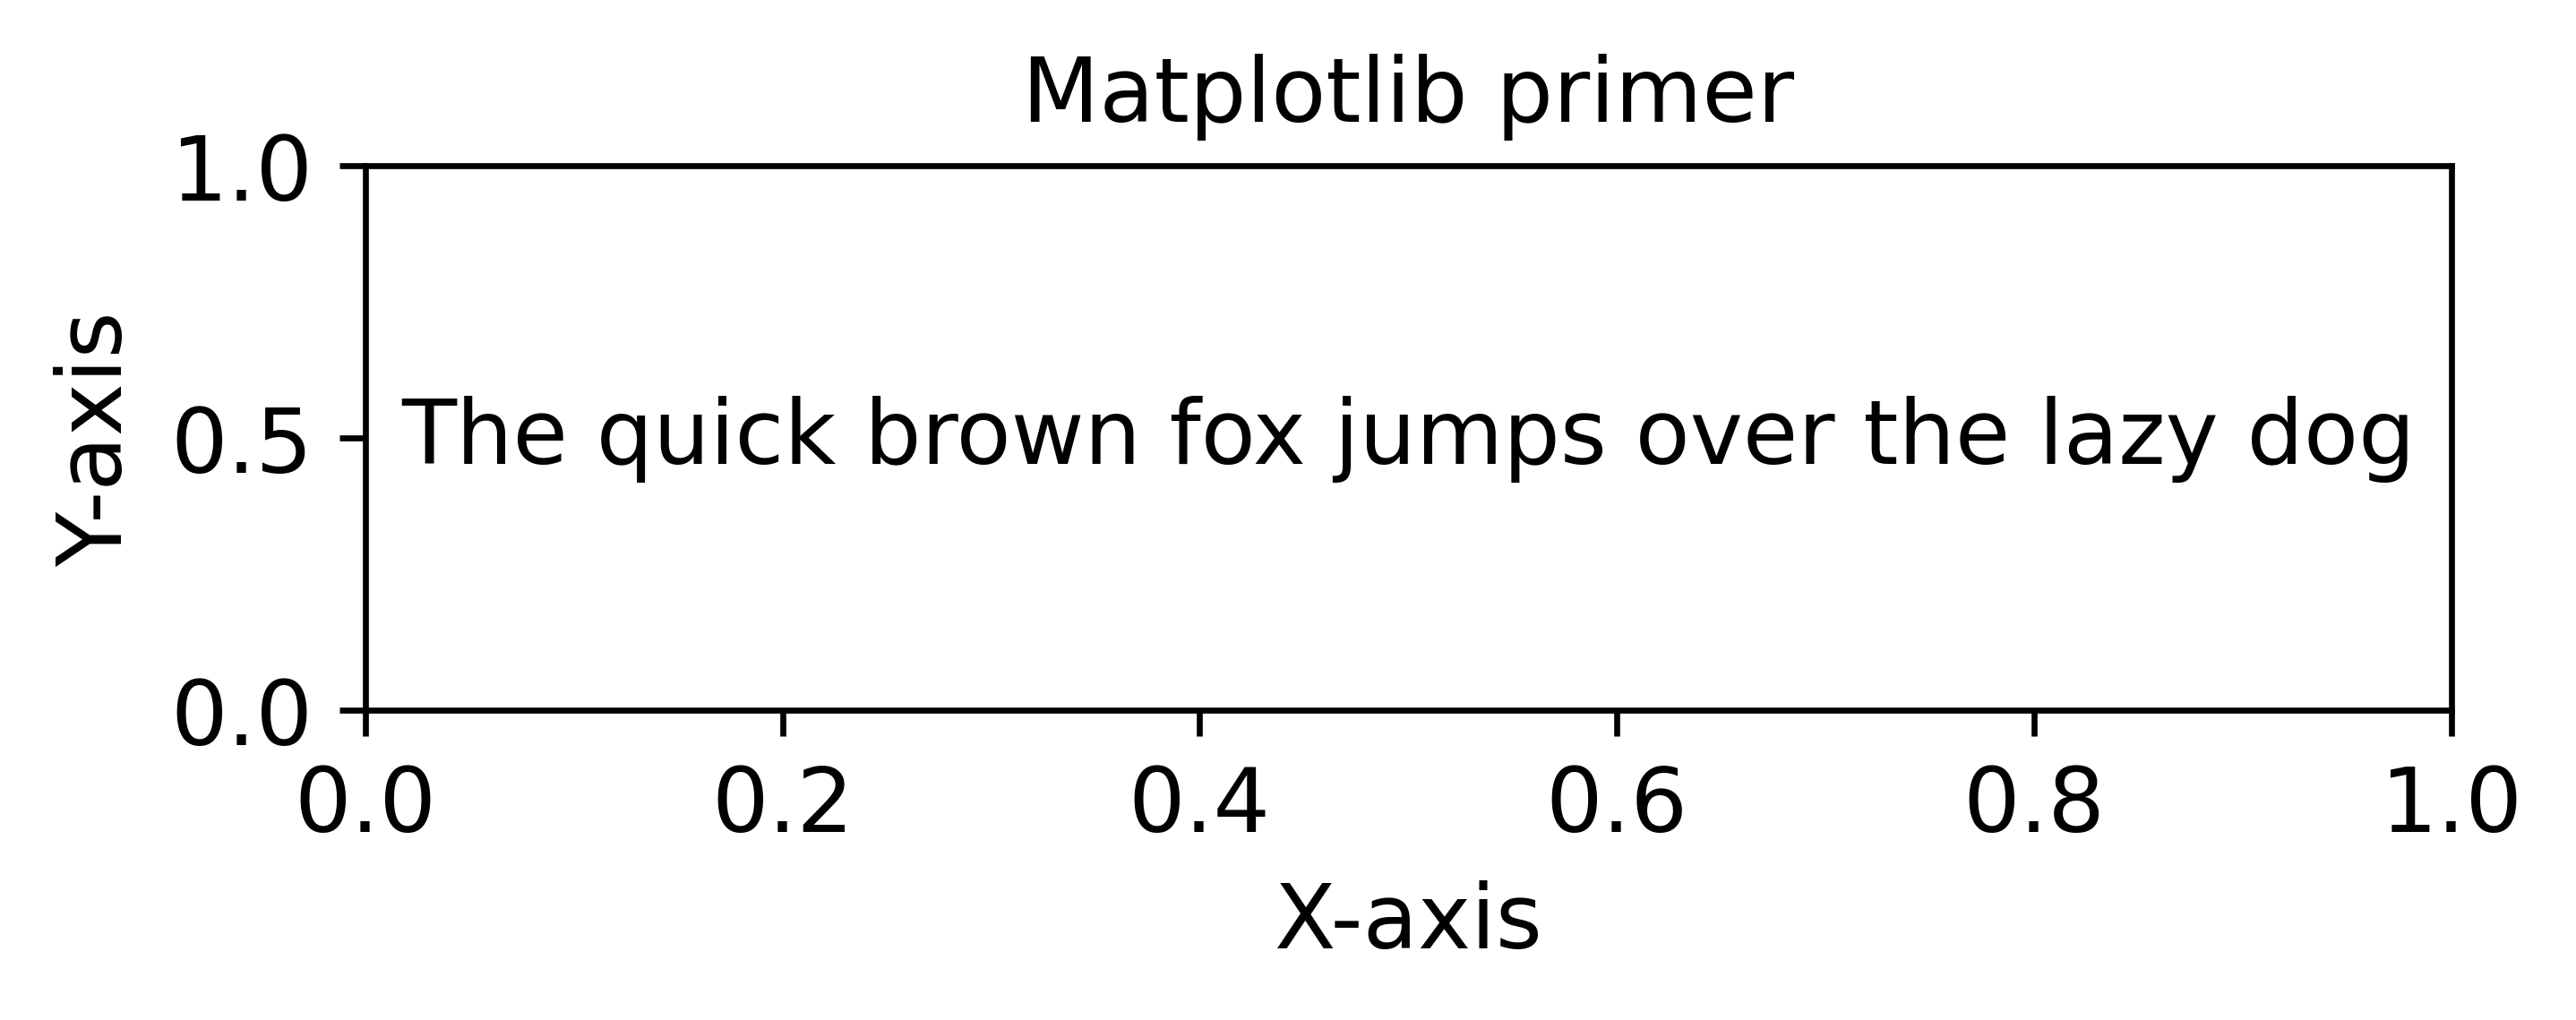

In [3]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(5, 2), dpi=600)
fontsize = 12
ax.text(x=0.5, y=0.5, s="The quick brown fox jumps over the lazy dog", ha="center", va="center", fontsize=fontsize)
ax.set_xlabel("X-axis", fontsize=fontsize)
ax.set_ylabel("Y-axis", fontsize=fontsize)
ax.tick_params(axis='both', which='both', labelsize=fontsize)
ax.set_title("Matplotlib primer", fontsize=fontsize)
fig.tight_layout()
fig.savefig("../../docs/source/images/figure_sized.png")
plt.show()

In [13]:
mpl.get_data_path()

'/Users/kislovskiy/development/Kislovskiy/ChartCraftHub/.venv/lib/python3.12/site-packages/matplotlib/mpl-data'

## From

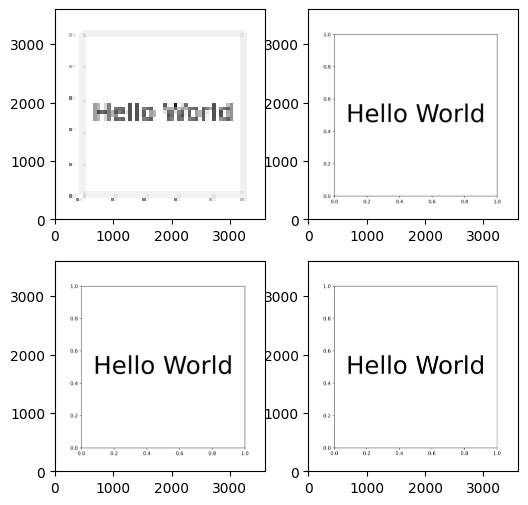

In [6]:
from matplotlib import pyplot as plt
from matplotlib import image


def figure_rendering(dpi=100):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.text(x=0.5, y=0.5, s="Hello World", fontsize=50, ha="center", va="center")
    fig.savefig(f"results/hello_world_{dpi:03}.png", dpi=dpi)
    plt.close()


for dpi in [10, 100, 300, 600]:
    figure_rendering(dpi)

image10 = image.imread("results/hello_world_010.png")
image100 = image.imread("results/hello_world_100.png")
image300 = image.imread("results/hello_world_300.png")
image600 = image.imread("results/hello_world_600.png")

height1, width1, _ = image10.shape
height2, width2, _ = image100.shape
height3, width3, _ = image300.shape
height4, width4, _ = image600.shape

common_width = max(width1, width2, width3, width4)
common_height = max(height1, height2, height3, height4)

fig, ax = plt.subplots(figsize=(6, 6), nrows=2, ncols=2)
ax[0, 0].imshow(image10, extent=[0, common_width, 0, common_height])
ax[0, 1].imshow(image100, extent=[0, common_width, 0, common_height])
ax[1, 0].imshow(image300, extent=[0, common_width, 0, common_height])
ax[1, 1].imshow(image600, extent=[0, common_width, 0, common_height])
plt.show()

## To

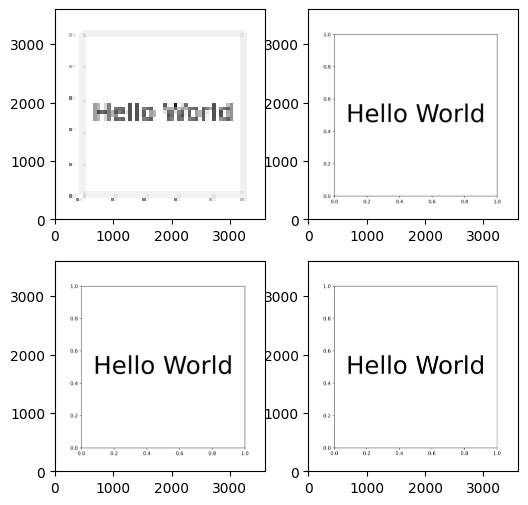

In [7]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from io import BytesIO


def render_hello_world_image(dpi):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.text(x=0.5, y=0.5, s="Hello World", fontsize=50, ha="center", va="center")

    # Save the figure to an in-memory BytesIO object
    img_buffer = BytesIO()
    fig.savefig(img_buffer, format="png", dpi=dpi)
    img_buffer.seek(0)

    # Read the image from the BytesIO object
    image = mpimg.imread(img_buffer)
    plt.close()

    return image


def get_common_size(images):
    heights, widths, _ = zip(*[img.shape for img in images])
    common_height = max(heights)
    common_width = max(widths)
    return common_width, common_height


def plot_images(images):
    num_images = len(images)
    ncols = int(num_images**0.5)
    nrows = (num_images + ncols - 1) // ncols

    fig, ax = plt.subplots(figsize=(6, 6), nrows=nrows, ncols=ncols)

    for i, img in enumerate(images):
        row = i // ncols
        col = i % ncols
        ax[row, col].imshow(img, extent=[0, common_width, 0, common_height])

    plt.show()


# Render hello world images
dpis = [10, 100, 300, 600]
hello_world_images = [render_hello_world_image(dpi) for dpi in dpis]

# Get common size
common_width, common_height = get_common_size(hello_world_images)

# Plot the images
plot_images(hello_world_images)